<img src="Figuras - Desafio 3/logo.png" style="width:1450px;height:250px"/>

# Ilum Escola de Ciência
### Curso: Termodinâmica Avançada
### Prof: Amauri Jardim de Paula
### Alunos: Gabriel Pereira e Isabela Beneti
### Desafio 3

#
## Descrição do desafio
O terceiro desafio para solução do problema principal da disciplina envolve:

#### **A combustão dos compostos escolhidos**

## Problemas

#### Para solucionar o desafio, alguns aspectos importantes devem ser considerados.

##### A. Os potenciais termodinâmicos (energia interna, entalpia, energia livre de Gibbs) envolvidos na reação de combustão.
##### B. A entropia envolvida na reação de combustão.
##### C.A equação de estado a ser usada para o sistema.

#
## Resoluções

### Importações

In [1]:
# Rode essa célula antes de rodar as seguintes, pois elas se utilizam das seguintes bibliotecas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funcoes_desafio_3 import *
import imageio
import warnings
from chempy import Equilibrium
from chempy import Substance
from chempy import balance_stoichiometry

### Esquema do Curso e Desafios

<center>
  <img src='./Figuras - Desafio 3/Esquema do Curso.png' style="width:900px;height:500px"/>
    
    Figura 1: esquema do curso e desafios
</center>

### Recapitulação

Antes de começarmos o terceiro desafio, é importante retomar o que foi feito no desafio anterior e o que obtemos como resultado dele:

No desafio anterior, nós separamos a mistura inicial- definida no desafio 1 como uma mistura de água com etanol a 40% v/v- por meio de destilação fracionada. Como resultado, obtivemos dois líquidos: uma mistura de etanol enriquecido (em fração molar 0.773) de massa 384.73 kg e 615.27 kg de água pura. 

Após disso, nós evaporamos o etanol enriquecido a 81.54°C, o que gerou **384.73 kg de etanol enriquecido gasoso**. Por fim, realizamos eletrólise da água, através da qual extraímos **47.85 kg de hidrogênio gasoso**.

É importante pontuar, também, que o processo de evaporação do útimo desafio foi realizado à pressão constante de 1 atm, num recipiente semelhante a um **balão**. Para esse próximo desafio, transferiremos o conteúdo de ambos os balões para um reator de **volume constante**.

In [2]:
# massas de etanol e água da mistura enriquecida em etanol
MASSA_AGUA_MISTURA = 39.59 # kg
MASSA_ETANOL_MISTURA = 345.12 # kg

# massa de hidrogênio
MASSA_HIDROGENIO = 47.85 # kg

# Condições da mistura enriquecida em etanol
TEMPERATURA_MISTURA = 379.54 #K
PRESSAO_MISTURA = 1 # atm

# Condições do hidrogênio
TEMPERATURA_HIDROGENIO = 273 #K
PRESSAO_HIDROGENIO = 1 # atm

# massas molares
MASSA_MOLAR_ETANOL = 46.07 # g/mol
MASSA_MOLAR_AGUA = 18 # g/mol
MASSA_MOLAR_HIDROGENIO = 2.016 # g/mol

### Problema A

#### Objetivo: 
 Calcular os potenciais termodinâmicos (energia interna, entalpia, energia livre de Gibbs) envolvidos na reação de combustão.

#### O que temos: 
##### Vapor de etanol:
- 81.54 °C.
- 1 atm.
- 384.73 kg.

##### Gás Hidrogênio:
- 25 °C.
- 1 atm.
- 47.85 kg.


#### O que iremos fazer:
- Encontrar a entalpia de formação do etanol à 25 °C.
- Encontrar a entalpia de formação do etanol gasoso à 81.54 °C.
- Encontrar a entalpia de formação da água e do gás carbônico à 25 °C.
- Encontrar a entalpia gerada pela combustão do etanol.
- Encontrar a entalpia gerada pela combustão do hidrogênio.

### Entalpia de Combustão:

A reação de combustão completa do etanol é dada por: 

$C_2H_5OH + 3O_2 \rightarrow 2CO_2 + 3H_2O$

Para encontrar a entalpia de combustão do etanol, basta calcular a diferença entre a soma das entalpias de formação dos reagentes e a soma das entalpias de fomação dos produtos.

De acordo com a literatura, $\Delta_f H[CO_2(g)] = -393.509 kJ mol^{-1}$, $\Delta_f H[H_2O(g)] = -285.83 kJ mol^{-1}$, $\Delta_f H[C_2H_5OH(g)] = -234,7 kJ mol^{-1}$ [1], no entanto, o etanol se encontra à 379.54 K, dessa forma, é necessário considerar a variação de entalpia ocasionada pela diferença de temperatura, dada por:

$\int_{298}^{379.54}C_P[C_2H_5OH(g)](T)dT$

Portanto,

$\Delta_f H[C_2H_5OH(g)](379.54 K) = \Delta_f H[C_2H_5OH(g)](298 K) + \int_{298}^{379.54}C_P(T)dT$

Logo, temos a seguinte conta, considerando a entalpia de formação do oxigênio como zero:

$\Delta_c H[C_2H_5OH(g)] = [2⋅-393.509 + 3⋅-285.83] - [1⋅(-234,7 + \int_{298}^{379.54}C_P(T)dT)]$

Portanto, para definir o calor gerado pela combustão, é necessário encontrar o valor de:

$\int_{298}^{379.54}C_P[C_2H_5OH(g)](T)dT$

Para tal, serão utilizados os dados de capacidade calorífica diponibilizados no [NIST]

In [3]:
######################## Importando os dados de capacidade calorífica do etanol ########################

ARQUIVO_EXCEL = "Dados - Desafio 3/Capacidade calorífica por temperatura - Etanol.xlsx" # Chamando o arquivo excel com dados experimentais obtido no site Home Distiller
NOME_DA_PLANILHA_O = "Planilha1" # Definindo a planila do arquivo xlsx que será utilizada
LINHA_CABECALHO = 0  # Definindo quantas linhas de cabeçalho existem, considerando que a primeira linha é a número 0
COLUNAS_CONTENDO_OS_DADOS = [0, 1] # Definindo quais colunas utilizaremos para montar o data frame, considerando que a primeira coluna é a número 0

df_C_et = pd.read_excel( # Criando o Data Frame do diagrama de fases da mistura escolhida (etanol + água)
    ARQUIVO_EXCEL,
    sheet_name=NOME_DA_PLANILHA_O,
    header=LINHA_CABECALHO,
    usecols=COLUNAS_CONTENDO_OS_DADOS,
)

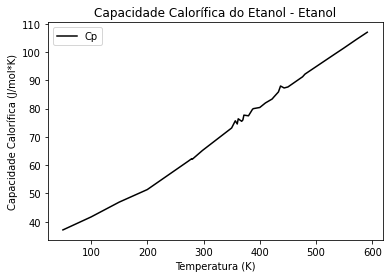

In [4]:
######################## Plotando os dados de capacidade calorífica do etanol ########################

fig = plt.figure()
ax1 = fig.add_subplot(111)
df_C_et.plot('Temperatura', 'Cp', ax=ax1, kind = 'line', color = 'black') # Plotando 
plt.title('Capacidade Calorífica do Etanol - Etanol') # Definindo título do gráfico
plt.xlabel('Temperatura (K)') # Definindo legendas dos eixos
plt.ylabel('Capacidade Calorífica (J/mol*K)')
plt.show() 

In [5]:
df_integral = df_C_et[:][7:16] # região onde está definida a integração (298 - 379.54)

df_integral

,Cp,Temperatura
7,65.21,298.15
8,73.15,350.01
9,75.70,356.55
10,74.57,360.00
11,76.40,361.75
12,75.52,367.90
13,76.00,370.01
14,77.70,371.85
15,77.46,380.00


In [6]:
INTEGRAL = np.trapz(df_integral['Temperatura'], df_integral['Cp'])*0.001 # kJ

In [7]:
ENTALPIA_DE_COMBUSTAO_ETANOL_MOL = (2*(-393.509) + 3*(-285.83)) - (1*(- 234.7) + INTEGRAL)

print(f'A entalpia gerada pela combustão do etanol foi igual a {ENTALPIA_DE_COMBUSTAO_ETANOL_MOL} kJ/mol.')

A entalpia gerada pela combustão do etanol foi igual a -1413.9340211 kJ/mol.


Considerando que a combustão foi realizada para toda a quantidade presente de etanol, é possível obter a quantidade total de energia transferida ao ciclo de rankine como:

In [8]:
N_MOLS_ETANOL = MASSA_ETANOL_MISTURA*1000/MASSA_MOLAR_ETANOL

print(N_MOLS_ETANOL)

7491.209029737356


In [9]:
ENTALPIA_DE_COMBUSTAO_ETANOL = ENTALPIA_DE_COMBUSTAO_ETANOL_MOL*N_MOLS_ETANOL

print(ENTALPIA_DE_COMBUSTAO_ETANOL)

-10592075.306317171


Portanto, a queima do etanol é responsável por liberar -10592075.3 kJ de energia ao ciclo de rankina. No entanto, o ciclo será alimentado, ainda, pela queima do hidrogênio obtido pela eletrólise, para isso, é necessário ressaltar que a combustão do hidrogênio produz apenas a molécula de $H_2O$, sendo sua reação dada por:

$H_2 + \frac{1}{2}O_2 \rightarrow H_2O$

Como $H_2$ e $O_2$ são substâncias puras, à temperatura ambiente, a entalpia de combustão do hidrogênio é igual à entalpia de formação da água, ou seja, $-285.83 kJ mol^{-1}$.

In [10]:
ENTALPIA_DE_COMBUSTAO_HIDROGENIO_MOL = -285.83

N_MOLS_HIDROGENIO = MASSA_HIDROGENIO*1000/MASSA_MOLAR_HIDROGENIO
print(N_MOLS_HIDROGENIO)

23735.119047619046


In [12]:
ENTALPIA_DE_COMBUSTAO_HIDROGENIO = ENTALPIA_DE_COMBUSTAO_HIDROGENIO_MOL*N_MOLS_HIDROGENIO

print(ENTALPIA_DE_COMBUSTAO_HIDROGENIO)

-6784209.0773809515


In [14]:
ENTALPIA_DE_COMBUSTAO_TOTAL = ENTALPIA_DE_COMBUSTAO_ETANOL + ENTALPIA_DE_COMBUSTAO_HIDROGENIO

print(f'A entalpia total gerada pela combustão do etanol e do hidrogênio foi de {ENTALPIA_DE_COMBUSTAO_TOTAL} kJ.')

A entalpia total gerada pela combustão do etanol e do hidrogênio foi de -17376284.38369812 kJ.


##
### Problema B

#### Objetivo
Determinar a entropia envolvida na reação de combustão.

#### O que temos:
- 

#### O que iremos fazer
- 

### Entropia de Combustão:

$ S(T)= \int_{0}^{T_{fus}}\frac{C^{S}_P(T)}{T}dT + \frac{\Delta_{fus}H}{T_{fus}} + \int_{T_{fus}}^{T_{vap}}\frac{C^{l}_P(T)}{T}dT + \frac{\Delta_{vap}H}{T_{vap}} + \int_{T_{vap}}^{T}\frac{C^{g}_P(T')}{T'}dT'$

### Problema C

#### Objetivo

Determinar a equação de estado a ser usada para o sistema.


#### O que temos:
- 

#### O que iremos fazer
- 

# Acesse o repositório do projeto!

Para melhor compreensão de cade etapa e de cada escolha do nosso projeto, acesse, clicando aqui ou no link abaixo, nosso [Repositório do Github](https://github.com/benetao/Termodinamica_Avancada), onde estão armazenados todos os notebooks e informações referentes aos desafios:

https://github.com/benetao/Termodinamica_Avancada

#
## Referências
- Livro An Introduction to Thermal Physics, Daniel V. Schroeder, Editora Addison-Wesley.
- Livro Physical Chemistry: A Molecular Approach, Donald A. McQuarrie, Editora Univesity Science Books.
- Livro Richard Feynman, Lições de Física Vol 1, Editora Bookman.
        Capítulo de Teoria Cinética dos Gases